<a href="https://colab.research.google.com/github/Dhaarani13/Project/blob/main/resnet50_(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm  # Progress bar for large datasets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/asl-alphabet


In [ ]:
0# Listing the directories in the path in a list

dataset_path = "/kaggle/input/asl-alphabet"
print("Dataset files:", os.listdir(dataset_path))

Dataset files: ['asl_alphabet_test', 'asl_alphabet_train']


In [ ]:
# Listing the classes in asl_alphabet_train

train_path = os.path.join(dataset_path, "asl_alphabet_train" , "asl_alphabet_train")
classes = os.listdir(train_path)

print("Classes in dataset:", classes)
print("Total classes:", len(classes))

Classes in dataset: ['N', 'R', 'space', 'B', 'I', 'del', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'nothing', 'J']
Total classes: 29


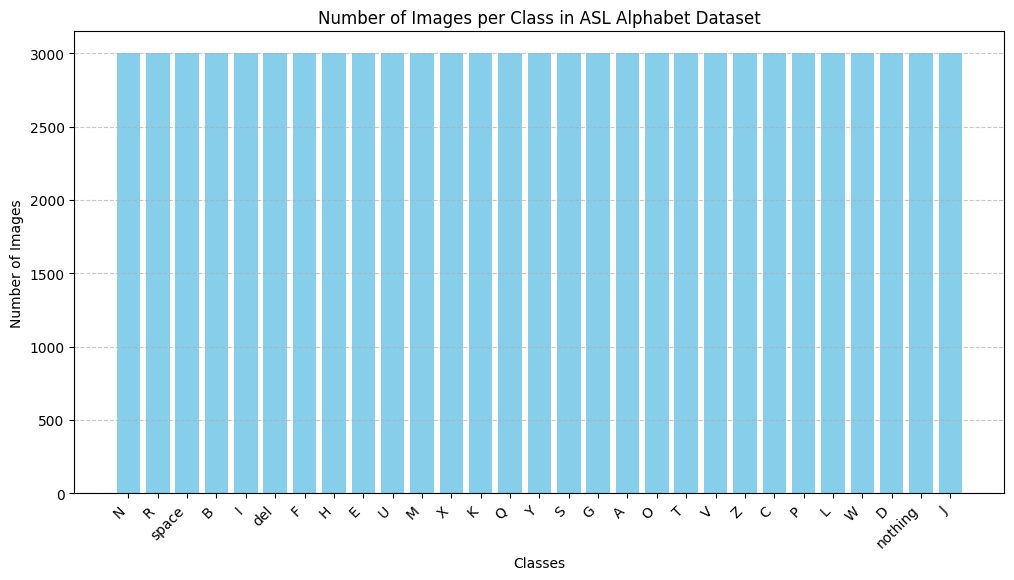

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to training dataset
train_path = os.path.join(dataset_path, "asl_alphabet_train", "asl_alphabet_train")

# Get class names
classes = os.listdir(train_path)

# Count images in each class
class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in classes}

# Sort by count (optional)
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in ASL Alphabet Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
# Listing the classes in asl_alphabet_test

train_path = os.path.join(dataset_path, "asl_alphabet_test" , "asl_alphabet_test")
clas = os.listdir(train_path)

print("Classes in dataset:", clas)
print("Total classes:", len(clas))

Classes in dataset: ['A_test.jpg', 'E_test.jpg', 'L_test.jpg', 'N_test.jpg', 'S_test.jpg', 'D_test.jpg', 'G_test.jpg', 'I_test.jpg', 'W_test.jpg', 'M_test.jpg', 'nothing_test.jpg', 'X_test.jpg', 'H_test.jpg', 'Q_test.jpg', 'C_test.jpg', 'T_test.jpg', 'P_test.jpg', 'V_test.jpg', 'Y_test.jpg', 'U_test.jpg', 'space_test.jpg', 'O_test.jpg', 'B_test.jpg', 'R_test.jpg', 'F_test.jpg', 'Z_test.jpg', 'J_test.jpg', 'K_test.jpg']
Total classes: 28


/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/O/O2062.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/del/del2711.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Y/Y1048.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N2457.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/S/S617.jpg


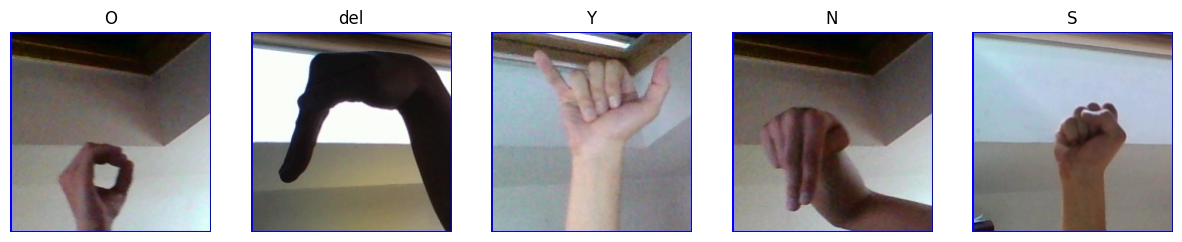

In [ ]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
#Calling the function
show_sample_images(dataset_path)

In [ ]:

# Define paths
input_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/"
output_dir = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Create output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Set target image size
IMG_SIZE = (100, 100)

# Function to preprocess images
def preprocess_images(input_dir, output_dir):
    for category in tqdm(os.listdir(input_dir)):  # Loop through A-Z, 0-9, etc.
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.isdir(category_path):
            continue  # Skip if it's not a directory

        os.makedirs(output_category_path, exist_ok=True)  # Create category folder in output

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Load image

            if img is None:
                continue  # Skip unreadable images

            img = cv2.resize(img, IMG_SIZE)  # Resize to 50x50
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

            # Apply binary thresholding (adaptive for better hand detection)
            _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

            # Normalize pixel values (convert to float between 0 and 1)
            img_normalized = img_thresh / 255.0

            # Save preprocessed image
            save_path = os.path.join(output_category_path, img_name)
            cv2.imwrite(save_path, (img_normalized * 255).astype(np.uint8))  # Convert back to uint8

# Run preprocessing
preprocess_images(input_dir, output_dir)

print("Preprocessing completed. Saved in:", output_dir)



100%|██████████| 29/29 [09:13<00:00, 19.09s/it]

Preprocessing completed. Saved in: /root/.cache/kagglehub/datasets/processed_asl_alphabet/


In [ ]:
preprocessed = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
print("Dataset files:", os.listdir(preprocessed))

Dataset files: ['H', 'Q', 'J', 'B', 'P', 'V', 'T', 'O', 'K', 'N', 'R', 'C', 'I', 'nothing', 'Z', 'space', 'W', 'del', 'M', 'F', 'A', 'D', 'G', 'Y', 'E', 'L', 'X', 'S', 'U']


/root/.cache/kagglehub/datasets/processed_asl_alphabet/G/G2743.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/L/L1410.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/V/V2323.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/Z/Z2588.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/N/N1978.jpg


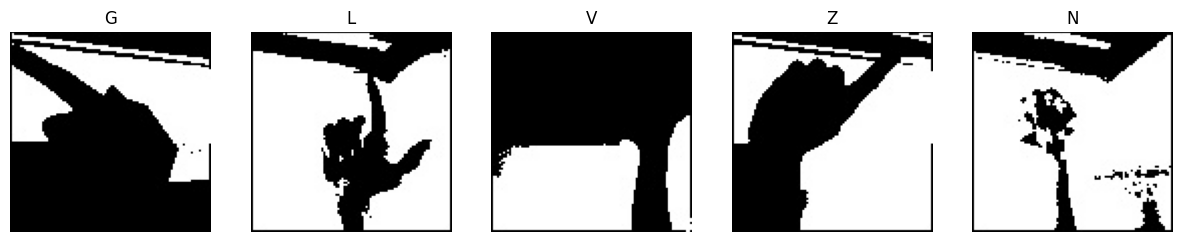

In [ ]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
#Calling the function
show_sample_images(dataset_path)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Basic Config
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
DATA_DIR = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Gentle Data Augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    validation_split=0.2
)

# Generators
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# ResNet50 Base (Frozen for stability)
base_model = ResNet50(
    input_shape=(*IMAGE_SIZE, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
base_model.trainable = False  # Fully frozen for now

# Custom Top Layers
inputs = keras.Input(shape=(*IMAGE_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(29, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# Slower learning
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=5e-5),
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.15),
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
    ModelCheckpoint('asl_steady_acc_model.keras', save_best_only=True)
]

# Train
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks
)

# Save model
model.save('asl_resnet50_steady_acc.keras')


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1110s 503ms/step - accuracy: 0.2008 - loss: 3.0689 - val_accuracy: 0.3929 - val_loss: 2.5115 - learning_rate: 5.0000e-05
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1063s 489ms/step - accuracy: 0.4404 - loss: 2.3645 - val_accuracy: 0.4696 - val_loss: 2.3107 - learning_rate: 5.0000e-05
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1057s 486ms/step - accuracy: 0.5255 - loss: 2.1522 - val_accuracy: 0.4973 - val_loss: 2.2264 - learning_rate: 5.0000e-05
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1094s 482ms/step - accuracy: 0.5770 - loss: 2.0329 - val_accuracy: 0.5234 - val_loss: 2.1765 - learning_rate: 5.0000e-05
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1052s 484ms/step - accuracy: 0.6031 - loss: 1.9672 - val_accuracy: 0.5367 - val_loss: 2.1391 - learning_rate: 5.0000e-05
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1142s 525ms/step - accuracy: 0.6313 - loss: 1.9081 - val_accuracy: 0.5462 - val_loss: 2.1182 - learning_rate: 5.0000e-05
Epoch 7/10
2175/2175 ━

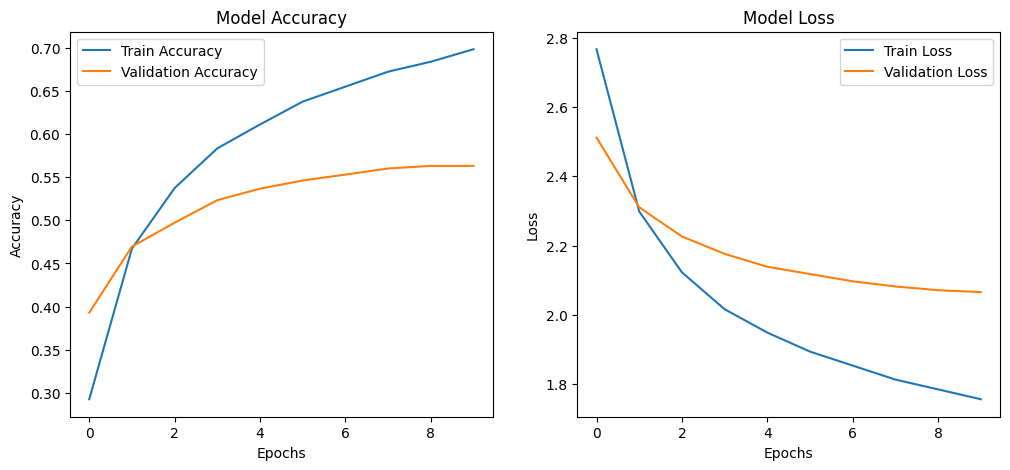

In [ ]:

import matplotlib.pyplot as plt

# Train the model and store history
#history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()